In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from functions import data_loaders, train, test, save
from fnn_id import FNN_ID

## Training

In [2]:
torch.manual_seed(43)

criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_loader, test_loader = data_loaders()

model = FNN_ID(750).to(device)
optimizer = optim.Adam(model.parameters())

In [3]:
%%time
steps, losses = train(model, device, train_loader, criterion, optimizer)

Train:
Epoch: 2	Loss: 0.4924
Epoch: 4	Loss: 0.3011
Epoch: 6	Loss: 0.3237
Epoch: 8	Loss: 0.2026
Epoch: 10	Loss: 0.2431
Epoch: 12	Loss: 0.4663
Epoch: 14	Loss: 0.3363
Epoch: 16	Loss: 0.2175
Epoch: 18	Loss: 0.4660
Epoch: 20	Loss: 0.3566
Epoch: 22	Loss: 0.2981
Epoch: 24	Loss: 0.3196
Time: 00:02:29
CPU times: user 1min 45s, sys: 41.6 s, total: 2min 26s
Wall time: 2min 29s


## Results

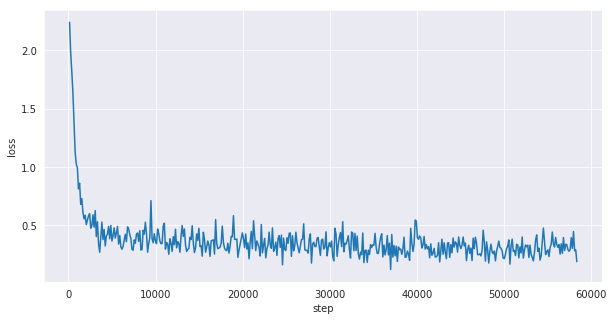

In [4]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=(10,5)
sns.lineplot(x=steps, y=losses).set(xlabel='step', ylabel='loss')
plt.show()

In [5]:
test(model, device, test_loader, criterion)
save(model)

Test:
Average loss: 0.0025	Accuracy: 90.68
